In [1]:
import os
import json
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Ellipse
import numpy as np
import pickle
import pandas as pd
import torch
import torch.nn.functional as F
import re

In [2]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'  # Catch errors immediately

import torch
torch.cuda.empty_cache()

In [3]:
from modules import (
    get_data_from_trajectory_id,
    create_simple_dataloader,
    Step_1,
    Step_2,
    CombinedHamiltonianLayer,
    SimpleStackedHamiltonianNetwork,
    ReverseStep2,
    ReverseStep1,
    ReverseCombinedHamiltonianLayer,
    InverseStackedHamiltonianNetwork,
    prediction_loss,
    prediction_loss_euclidean,
    load_checkpoint,
    count_parameters,
    hsic_loss_statistics_only,
    hsic_loss
    )

In [4]:
from modules import (    
    calculate_phi_A,
    add_phi_A_columns,
    plot_differencies,
    plot_prediction_vs_ground_truth,
    plot_euclidean_distance_over_time,
    test_model_in_single_trajectory,
    analyze_means_with_constants,
    visualize_trajectory_movements_with_std_ellipses,
    visualize_epoch_metrics,
    analyze_folders_means,
    analyze_mapping_net,
    test_model_in_all_trajectories_in_df,
    test_model_variance_in_all_trajectories_in_df,
    plot_prediction_losses,
    plot_variance_losses,
    test_model_with_varying_observed_points,
    test_model_variance_with_varying_observed_points,
    compute_jacobian_functional,
    compute_symplectic_product,
    check_canonical_transformation,
    test_canonical_tranformation_on_trajectory,
    )

In [5]:
save_dir_path = "./save_directory_7" 


In [6]:
with open("all_dataframes.pkl", "rb") as f:
    loaded_dfs = pickle.load(f)

# Access them like before:
train_df = loaded_dfs['train_df']
val_df = loaded_dfs['val_df']
test_df = loaded_dfs['test_df']

train_id_df = loaded_dfs['train_id_df']
val_id_df = loaded_dfs['val_id_df']
test_id_df = loaded_dfs['test_id_df']

with open("df_high_energy_revised.pkl", "rb") as f:
    df_high_energy_revised = pickle.load(f)

val_df_high_energy_revised = df_high_energy_revised['val_df_high_energy_revised']
val_id_df_high_energy_revised = df_high_energy_revised['val_id_df_high_energy_revised']

test_df_high_energy_revised = df_high_energy_revised['test_df_high_energy_revised']
test_id_df_high_energy_revised = df_high_energy_revised['test_id_df_high_energy_revised']

In [7]:
train_id_df_added = add_phi_A_columns(train_id_df)
val_id_df_added = add_phi_A_columns(val_id_df)
val_id_df_high_energy_revised_added = add_phi_A_columns(val_id_df_high_energy_revised)


📊 Metric summaries:
  Lowest loss of metric 'val_prediction_loss_' recorded in epoch 1008 with the value: 5.9184, the losses of the last 5 epochs are: ['5.9235', '5.9378', '5.9184', '5.9400', '5.9298']
  Lowest loss of metric 'train_variance_loss_' recorded in epoch 1001 with the value: 47.9259, the losses of the last 5 epochs are: ['48.0202', '48.0367', '48.0629', '48.1821', '48.0853']
  Lowest loss of metric 'train_prediction_loss_' recorded in epoch 972 with the value: 5.9718, the losses of the last 5 epochs are: ['6.1054', '6.1213', '6.1794', '6.1173', '6.1156']
  Lowest loss of metric 'val_variance_loss_training_set' recorded in epoch 1004 with the value: 47.8736, the losses of the last 5 epochs are: ['48.0985', '47.9263', '48.1058', '48.0124', '48.1261']
  Lowest loss of metric 'val_prediction_loss_training_set' recorded in epoch 999 with the value: 5.6621, the losses of the last 5 epochs are: ['5.6674', '5.6669', '5.6730', '5.6664', '5.6632']
  Lowest loss of metric 'val_varian

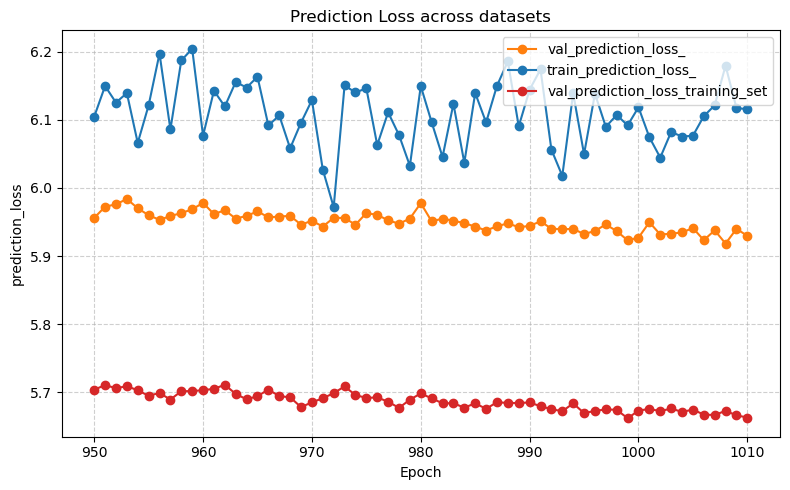

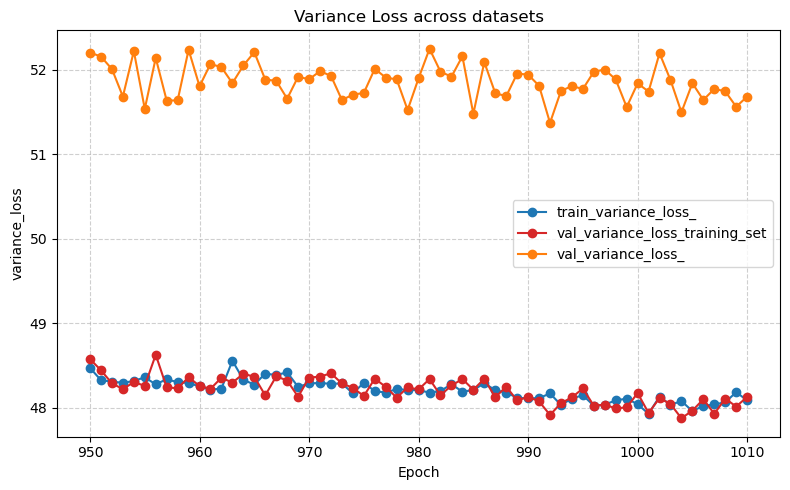

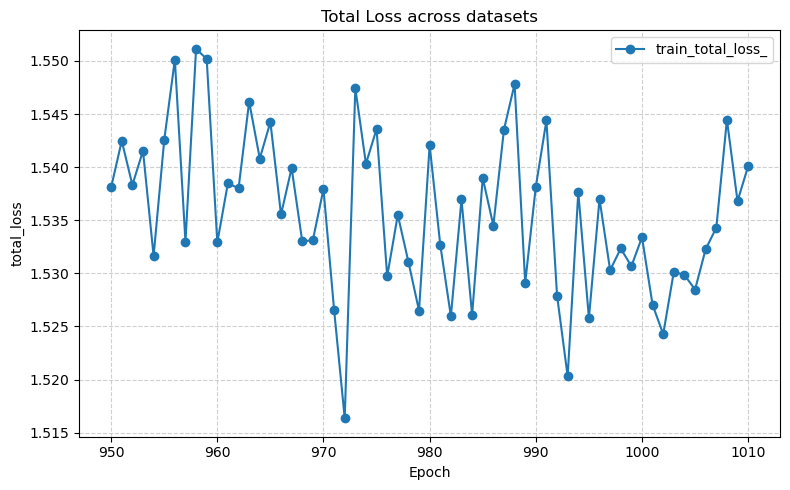

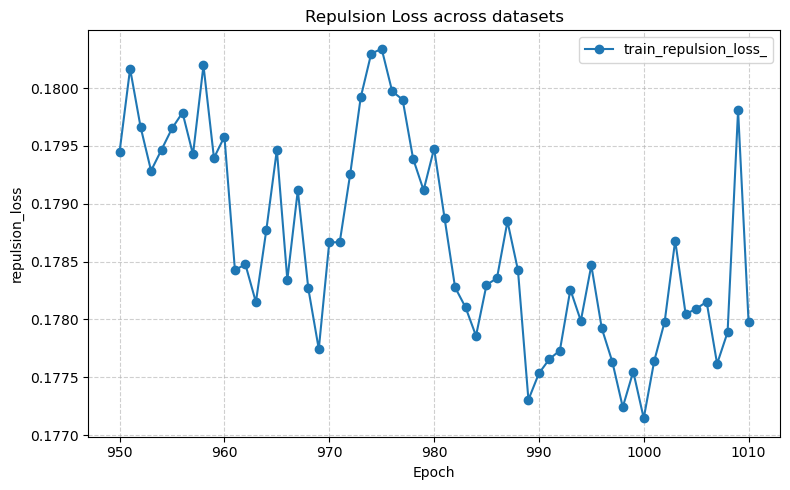

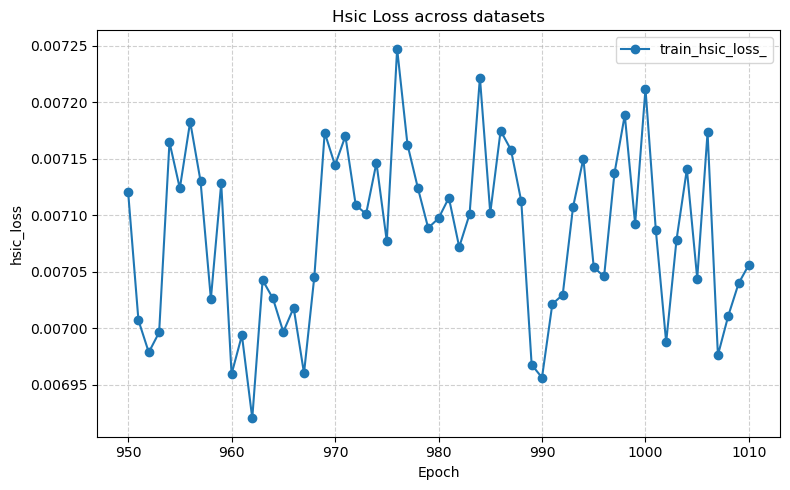

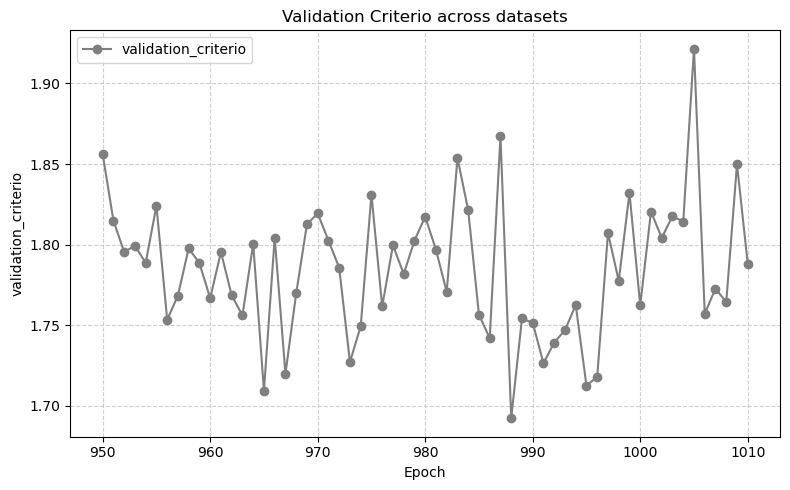

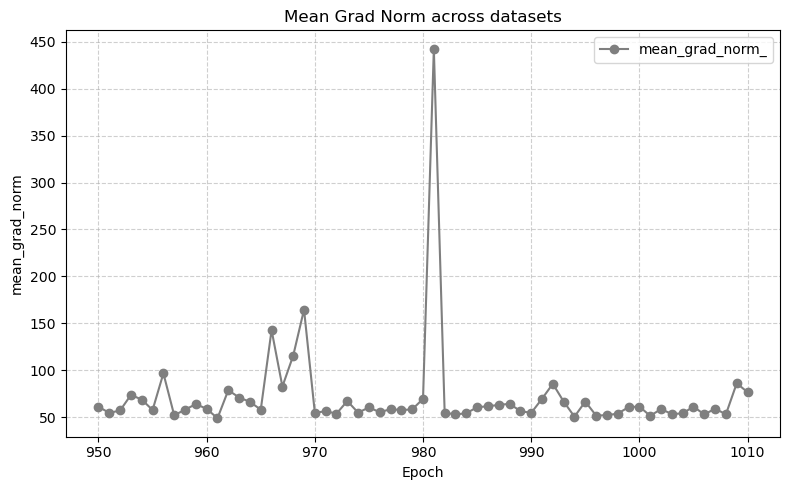

In [11]:
visualize_epoch_metrics(
 save_dir_path,
["val_prediction_loss_", "train_variance_loss_", "train_prediction_loss_", "val_variance_loss_training_set", "val_prediction_loss_training_set",  "val_variance_loss_", "train_total_loss_", "train_repulsion_loss_", "train_hsic_loss_" , "validation_criterio", "mean_grad_norm_"],
plot_on_same_graph=True,
verbose=True,
specific_epochs=[950,"last"]
)




📊 Processing directory: val_trajectories_data

For the epoch_850 in val_trajectories_data the values are:
92: X_mean = 7.5401 ± 4.6558, U_mean = -13.5801 ± 5.5518 and A=13.564677634903196, phi=-2.7802771843251053
64: X_mean = 5.5607 ± 3.8834, U_mean = -11.9749 ± 4.4809 and A=11.313750136394223, phi=-2.8600808883112765
6: X_mean = 3.6796 ± 4.4689, U_mean = -4.7791 ± 2.4103 and A=3.4643759649388923, phi=0.5272390069263062

📊 Processing directory: val_train_set_trajectories_data

For the epoch_850 in val_train_set_trajectories_data the values are:
2: X_mean = -1.9619 ± 2.9363, U_mean = -8.0034 ± 1.2197 and A=2.0004916751010886, phi=-1.322539930867642
120: X_mean = -1.1278 ± 7.7173, U_mean = 0.1019 ± 6.5847 and A=15.491933918298438, phi=-0.3577443145058989
96: X_mean = 2.6423 ± 5.5026, U_mean = 0.4204 ± 6.0482 and A=13.856421371448707, phi=0.050548714589954684

📊 Processing directory: val_high_energy_trajectories_data

For the epoch_850 in val_high_energy_trajectories_data the values are:

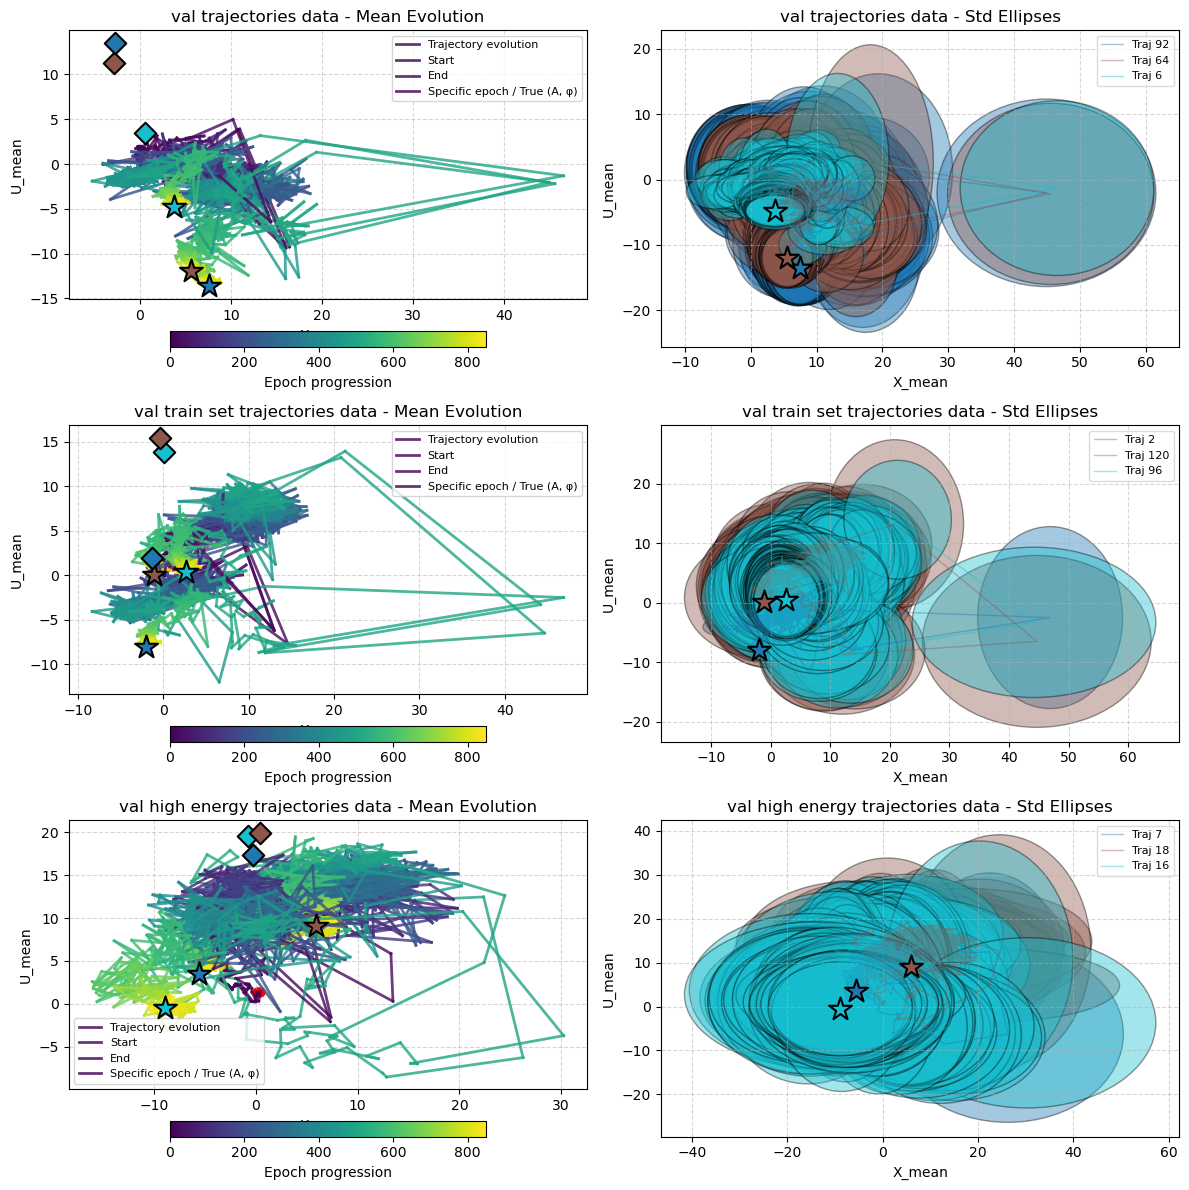


✅ Mean + Std (ellipse) visualization complete.


In [31]:
visualize_trajectory_movements_with_std_ellipses(save_dir_path, number_of_points_to_plot=3, right_plot_alpha=0.4, verbose=True, specific_epoch = "last", visualize_true_constants=True,train_id_df_added=train_id_df_added,val_id_df_added=val_id_df_added,val_id_df_high_energy_added=val_id_df_high_energy_revised_added)

In [32]:
val_differencies_df, val_train_differencies_set_df, val_high_energy_differencies_df = analyze_means_with_constants(
    save_dir_path=save_dir_path,
    specific_epoch="last",
    train_id_df_added=train_id_df_added,
    val_id_df_added=val_id_df_added,
    val_id_df_high_energy_added=val_id_df_high_energy_revised_added
)

📂 Using data from epoch: epoch_850
✅ Data extraction complete.


In [33]:
hsic_loss_statistics_only(
    x=torch.Tensor(val_train_differencies_set_df['A']),
    y=torch.Tensor(val_train_differencies_set_df['phi']),
    sigma_x = -1,
    sigma_y = -1,
    use_unbiased = True,
    epsilon = 1e-10)

tensor(0.)

In [34]:
hsic_loss_statistics_only(
    x=torch.Tensor(val_train_differencies_set_df['X_mean']),
    y=torch.Tensor(val_train_differencies_set_df['U_mean']),
    sigma_x = -1,
    sigma_y = -1,
    use_unbiased = True,
    epsilon = 1e-10)

tensor(0.0038)

0.0657

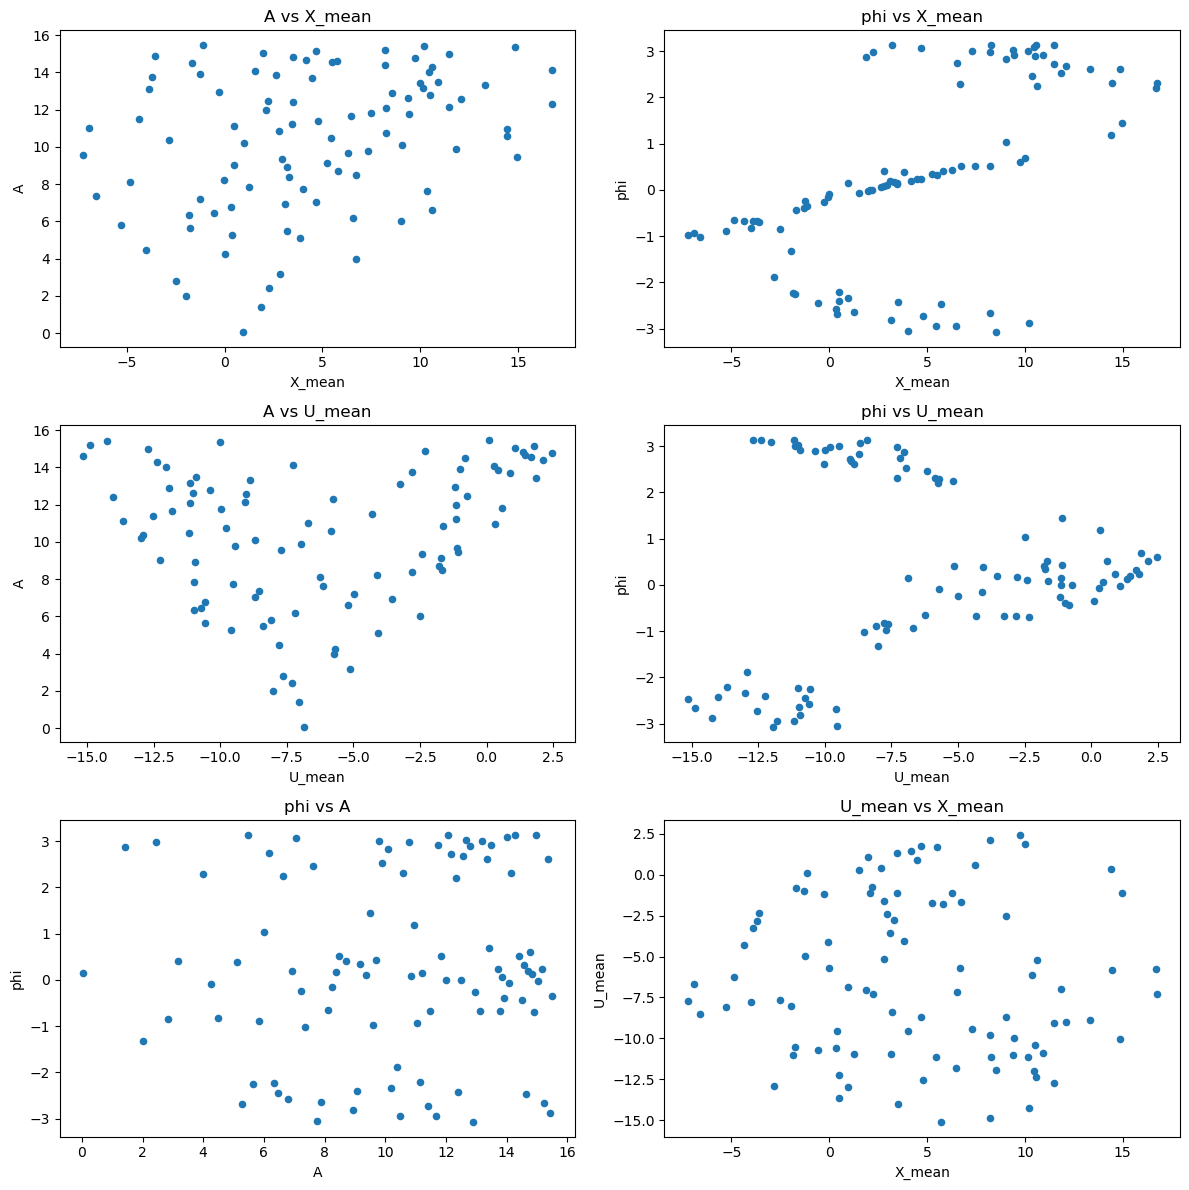

In [35]:
plot_differencies(val_train_differencies_set_df)

📊 Analyzing 105 epochs across 3 directories...

📁 Processing directory: val_trajectories_data

📁 Processing directory: val_train_set_trajectories_data

📁 Processing directory: val_high_energy_trajectories_data


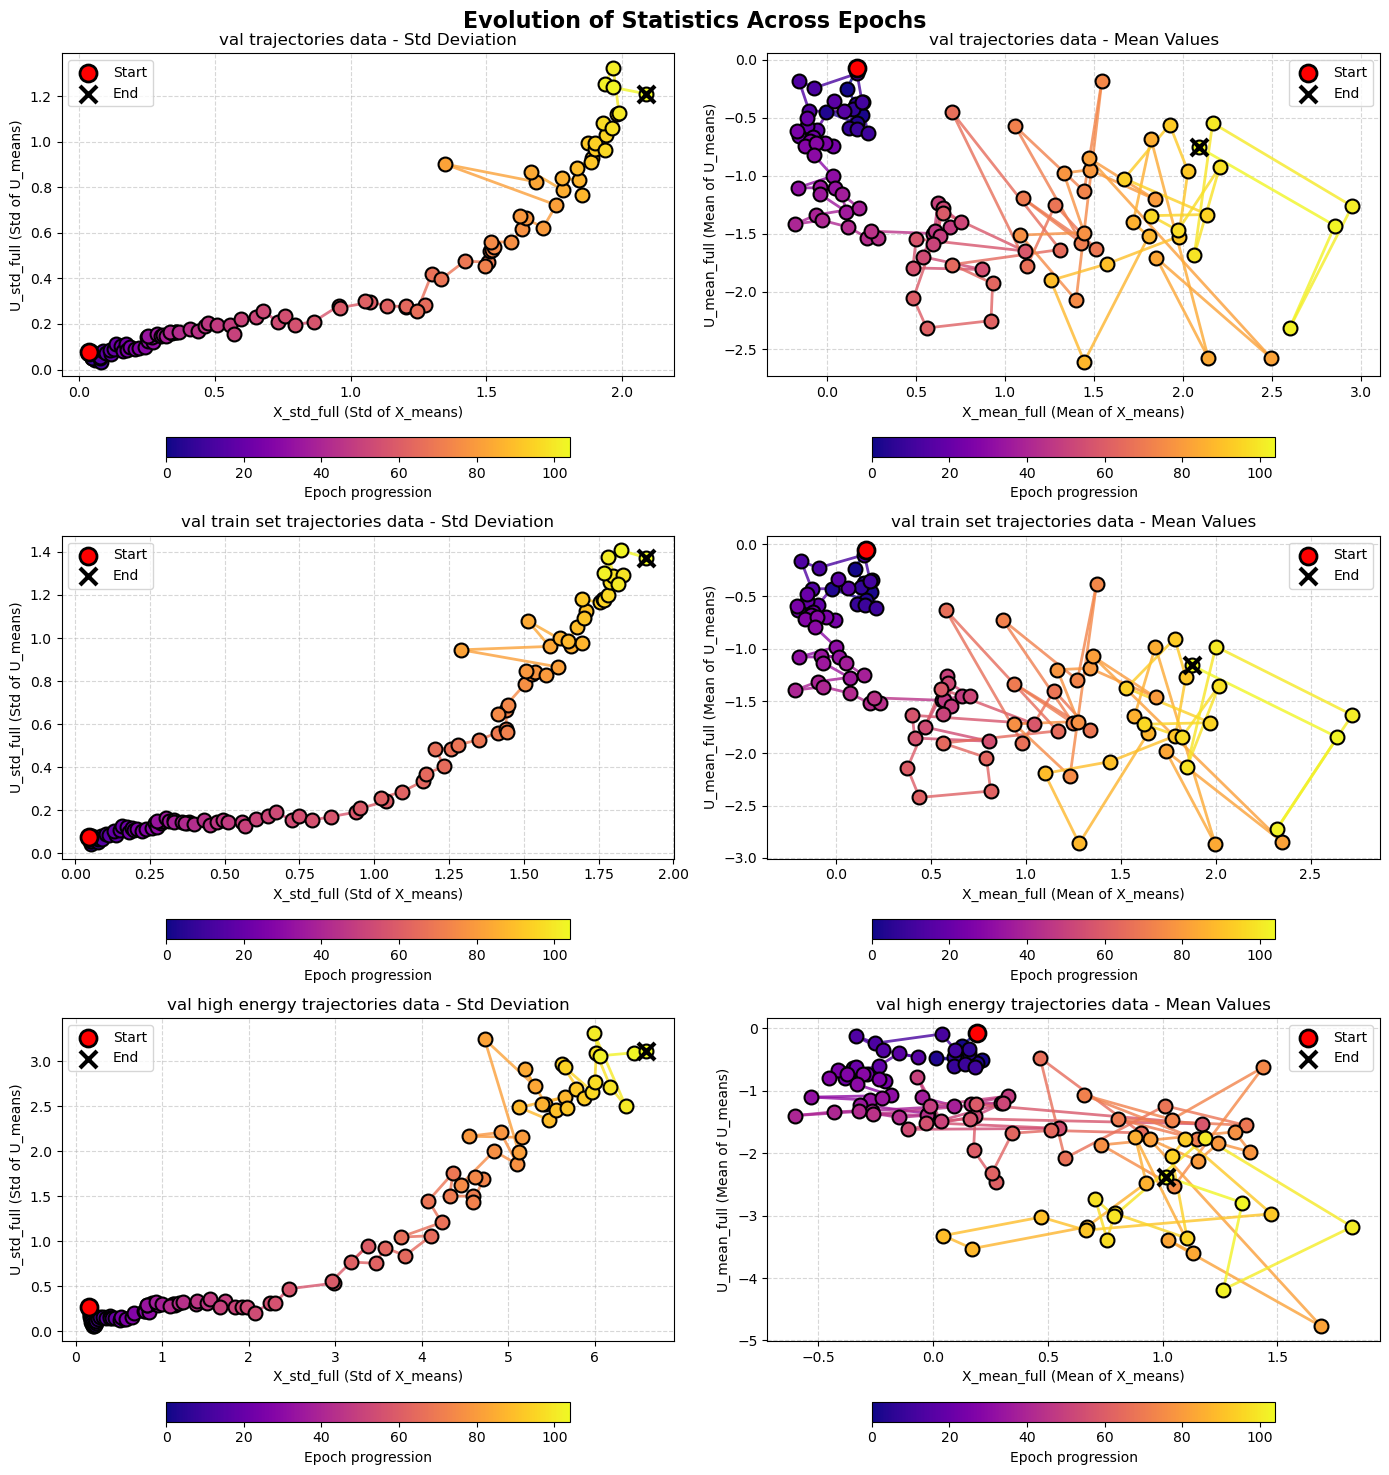

In [35]:
analyze_folders_means(save_dir_path, locate_epoch=None)

In [8]:
device = "cuda"
mapping_net = SimpleStackedHamiltonianNetwork(
        #Hpw many Step_1 + Step_2 layers to stack
    n_layers=10,
        # MLP Architecture parameters
    hidden_dims= [10, 20, 10],
    n_hidden_layers = None,   #Leave None if you provide list on hidden_dims
        
        # Activation parameters
    activation = 'gelu',
    activation_params = None,
    final_activation = None,   #Final layer activation function
    #final_activation_only_on_final_layer = True,
    tanh_wrapper = False,
        
        # Initialization parameters
    weight_init = 'orthogonal',
    weight_init_params = {'gain': 1},
    bias_init = 'zeros',
    bias_init_value = 0.0,
        
        
        # Architectural choices
    use_bias = True,
    use_layer_norm = False,
    
    # Input/Output parameters
    input_dim = 2,  # x or u and t
    output_dim = 1,  # scalar G or F
    a_eps_min= 0.5,  # Minimum value for a
    a_eps_max= 2,  # Maximum value for a  
    a_k= 0.1,

    step_1_a_mean_innit= 1.2,
    step_2_a_mean_innit= 1.2,
    std_to_mean_ratio_a_mean_init= 0.0,

    step_1_gamma_mean_innit= 0.5,
    step_2_gamma_mean_innit= 0.5,
    std_to_mean_ratio_gamma_mean_init= 0.0,

    step_1_c1_mean_innit= 0.0,
    step_2_c1_mean_innit= 0.0,
    std_to_mean_ratio_c1_mean_init= 1.0,

    step_1_c2_mean_innit= 0.0,
    step_2_c2_mean_innit= 0.0,
    std_to_mean_ratio_c2_mean_init= 1.0,

    bound_innit=0.0,
).to(device)

checkpoint_path = os.path.join(save_dir_path, "best_model.pt")

load_checkpoint(path=checkpoint_path, mapping_net=mapping_net, device=device, optimizer=None, scheduler=None)

inverse_net = InverseStackedHamiltonianNetwork(forward_network=mapping_net)


Successfully loaded model
Created inverse network with 10 reverse layers


/home/thomasdev/Desktop/Hamilton_Jacobi_NN/Hamilton_Jacobi_NN/modules.py:4053: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path, map_location=devic

In [10]:
test_canonical_tranformation_on_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, compute_jacobian_functional_function=compute_jacobian_functional, compute_symplectic_product_function=compute_symplectic_product, check_canonical_transformation_function=check_canonical_transformation, tolerance=1e-4, test_id_df=val_id_df, test_df=val_df, trajectory_id=50, mapping_net=mapping_net, inverse_net=inverse_net, device=device)

For the mapping network:
Samples [5] failed the canonical test
  Maximum error across all samples: 3.91e-03
For the inverse network:
✓ All 242 transformations are canonical (preserve symplectic structure)!
  Maximum error across all samples: 1.67e-06


In [11]:
count_parameters(mapping_net)

9500

   num_observed_points  mean_loss
0                    1   8.921283
1                    2   7.404505
2                    3   6.201587
3                    4   7.342456
4                    5   7.105437
5                    6   6.123176
6                    7   5.787048
7                    8   5.485857
8                    9   5.274617
9                   10   5.015506


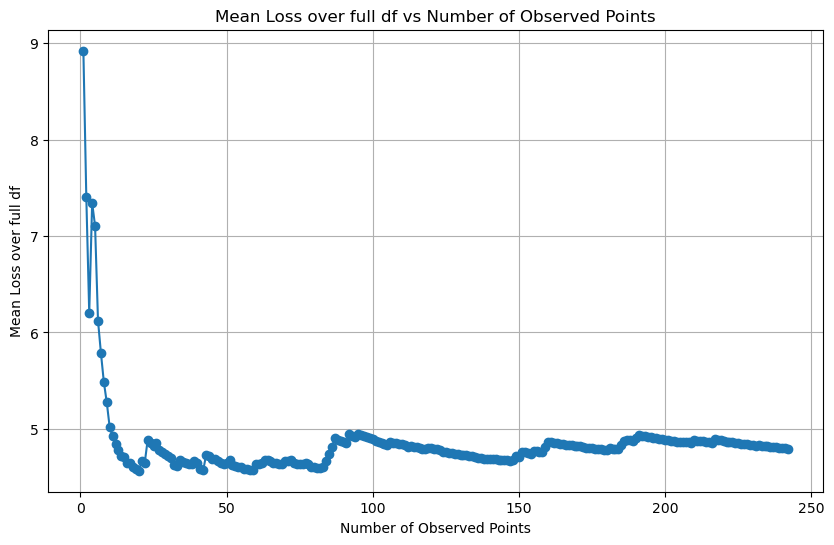

In [12]:
val_loss_per_points_df = test_model_with_varying_observed_points(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=val_id_df, test_df=val_df, mapping_net=mapping_net, inverse_net=inverse_net, device=device)

   num_observed_points  mean_variance
0                    1       0.000000
1                    2       0.879002
2                    3       1.195511
3                    4      27.355677
4                    5      22.840732
5                    6      19.735419
6                    7      16.963785
7                    8      59.969503
8                    9      53.522983
9                   10      48.538586


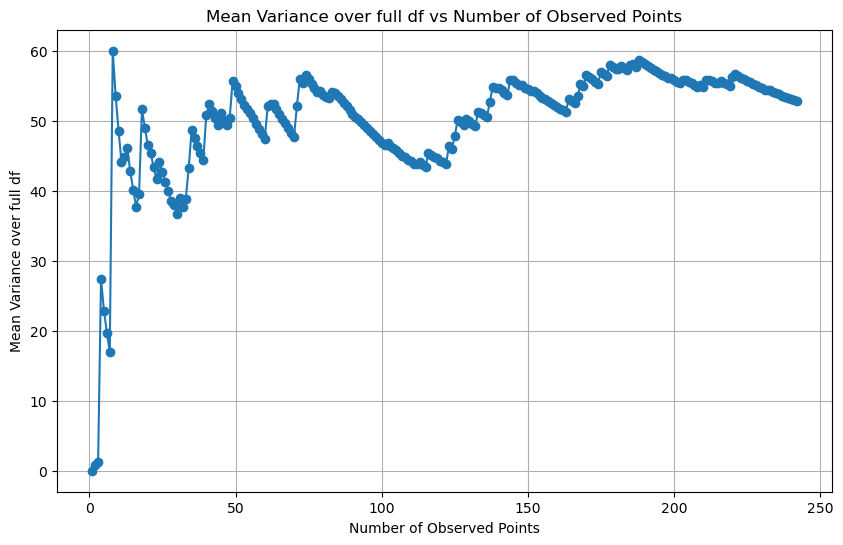

In [13]:
val_variance_per_points_df = test_model_variance_with_varying_observed_points(get_data_from_trajectory_id_function=get_data_from_trajectory_id ,test_id_df=val_id_df, test_df=val_df, mapping_net=mapping_net ,device=device)

In [9]:
point_indexes_observed = [0]

In [10]:
k=1
mass=1
constant = -(k / mass)
omega = np.sqrt(-constant)
period = 2*np.pi/omega

     trajectory_id      energy  prediction_loss  loss_per_sqrt_energy
6                6    6.000950         2.879049              1.175274
11              11   11.000909         2.745218              0.827680
28              28   28.000769         5.762415              1.088979
43              43   43.000645         7.861669              1.198884
50              50   50.000587         4.083870              0.577543
64              64   64.000471         4.810475              0.601307
71              71   71.000413         4.651579              0.552039
85              85   85.000298         5.626218              0.610248
92              92   92.000240         6.241301              0.650700
93              93   93.000231         4.407293              0.457014
103            103  103.000149         5.039833              0.496589
114            114  114.000058         5.477699              0.513033
Mean prediction loss over full dataframe: 4.9656


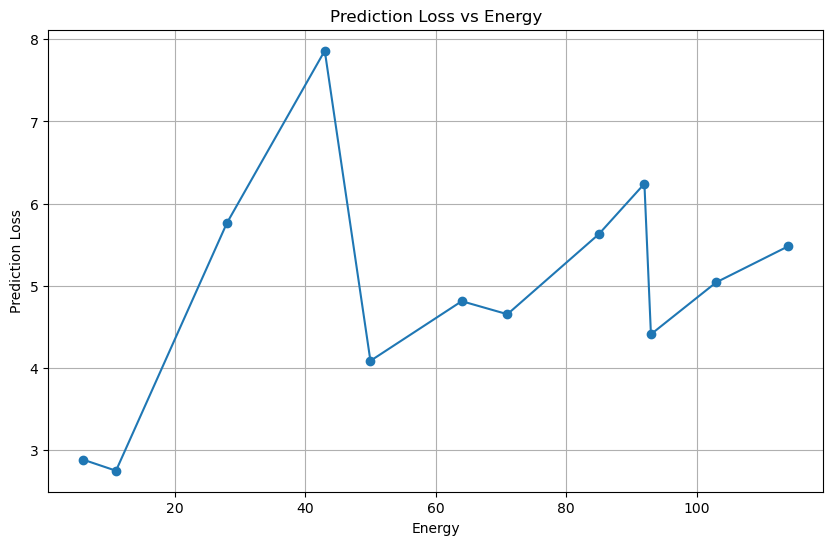

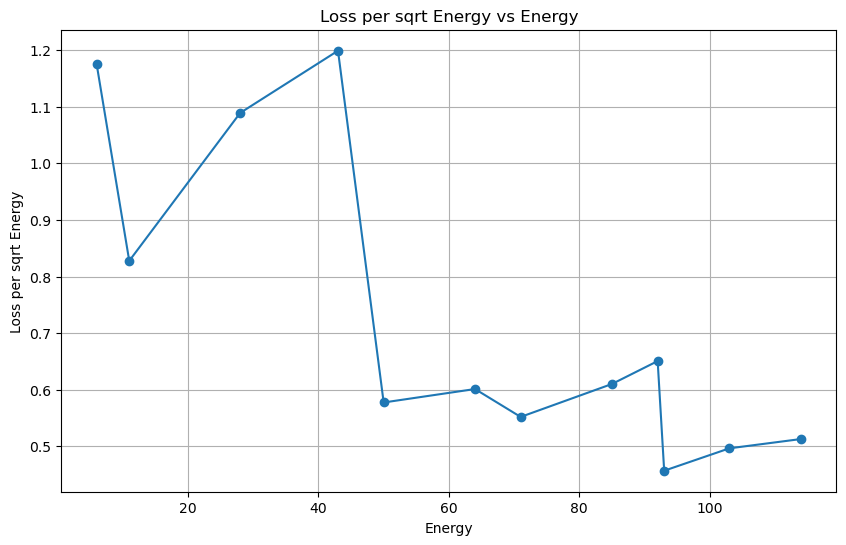

In [17]:
prediction_val_df, mean_prediction_loss_val = test_model_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=val_id_df, test_df=val_df, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed)

     trajectory_id      energy  variance_loss  variance_per_sqrt_energy
6                6    6.000950            0.0                       0.0
11              11   11.000909            0.0                       0.0
28              28   28.000769            0.0                       0.0
43              43   43.000645            0.0                       0.0
50              50   50.000587            0.0                       0.0
64              64   64.000471            0.0                       0.0
71              71   71.000413            0.0                       0.0
85              85   85.000298            0.0                       0.0
92              92   92.000240            0.0                       0.0
93              93   93.000231            0.0                       0.0
103            103  103.000149            0.0                       0.0
114            114  114.000058            0.0                       0.0
Mean prediction loss over full dataframe: 0.0000


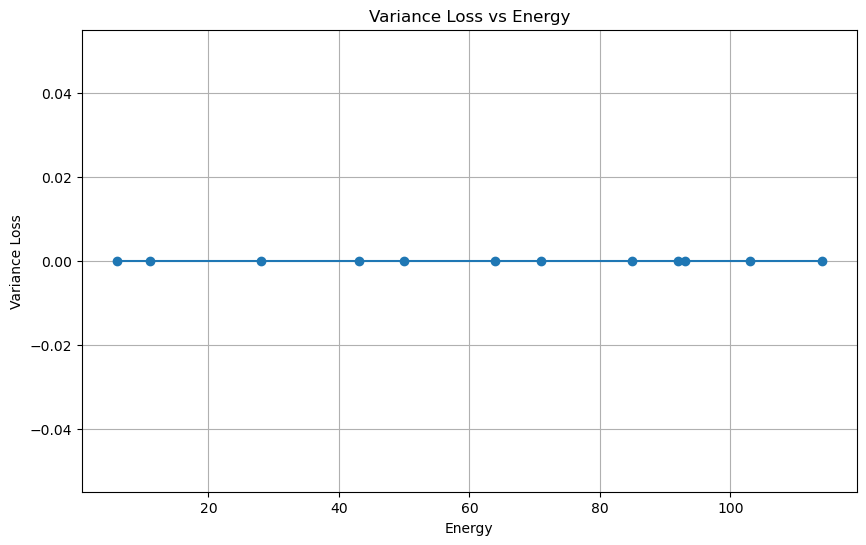

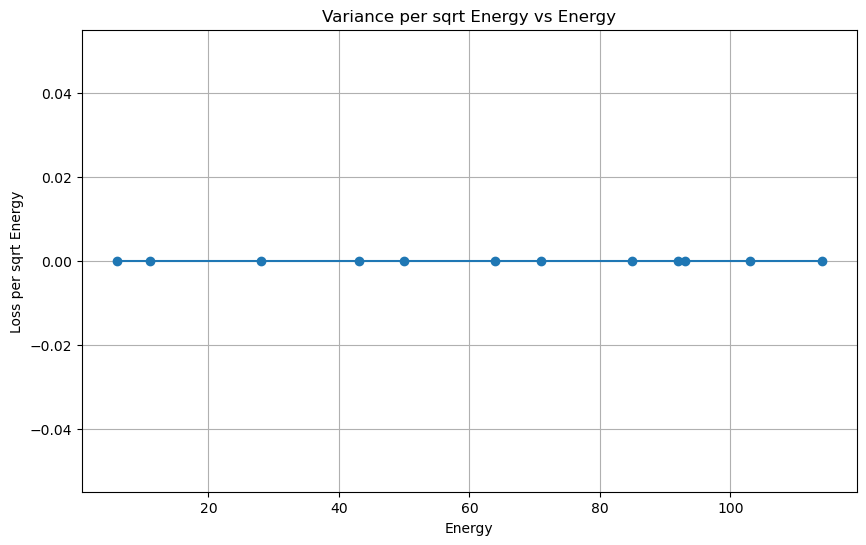

In [18]:
variance_val_df, mean_variance_loss_val = test_model_variance_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, test_id_df=val_id_df, test_df=val_df, mapping_net=mapping_net, device=device, point_indexes_observed=point_indexes_observed)


Observed time points: [0.]


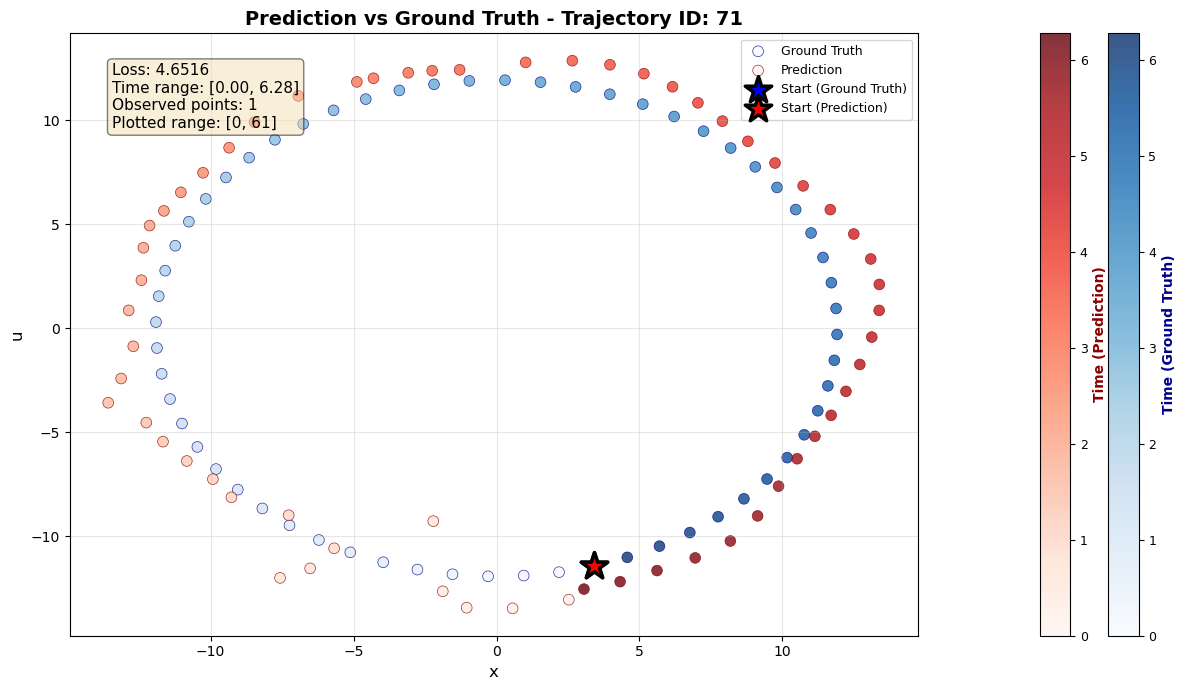

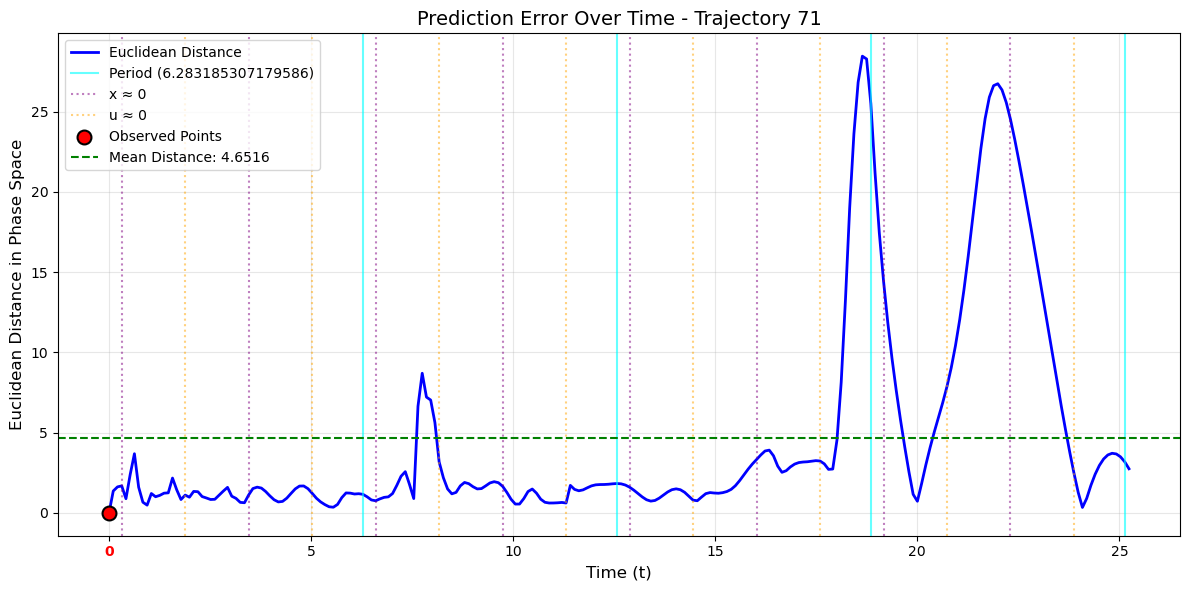

In [21]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=val_id_df, test_df=val_df, trajectory_id=71, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, connect_points=False, portion_to_visualize=[0,61], show_zeroings=True, show_period=True, period=period)

     trajectory_id      energy  prediction_loss  loss_per_sqrt_energy
7                7    7.000942         2.230782              0.843100
12              12   12.000901         3.577413              1.032671
32              32   32.000736         3.647350              0.644759
37              37   37.000694         3.697472              0.607855
39              39   39.000678         3.023477              0.484140
53              53   53.000562         3.890006              0.534331
57              57   57.000529         8.605433              1.139812
67              67   67.000446         7.877319              0.962364
75              75   75.000380         5.746274              0.663521
81              81   81.000331         5.619318              0.624367
88              88   88.000273         4.610482              0.491478
101            101  101.000165         4.771705              0.474802
117            117  117.000033         6.213117              0.574403
Mean prediction loss

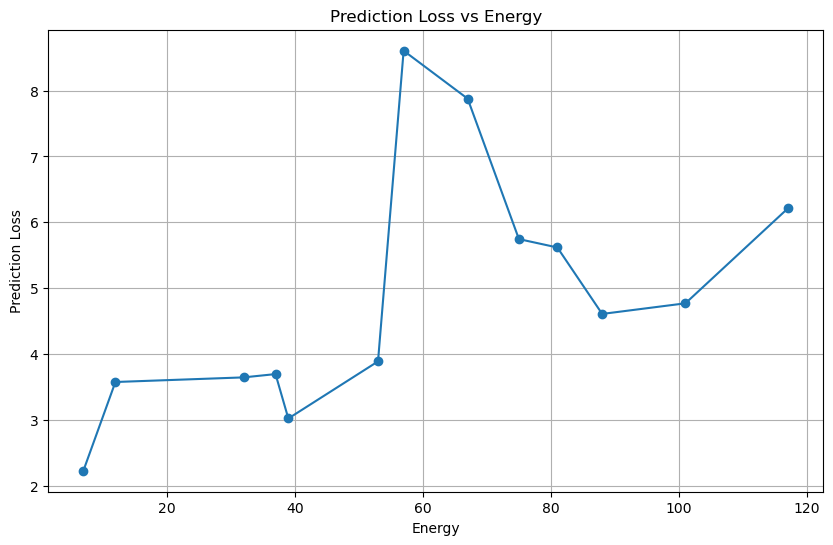

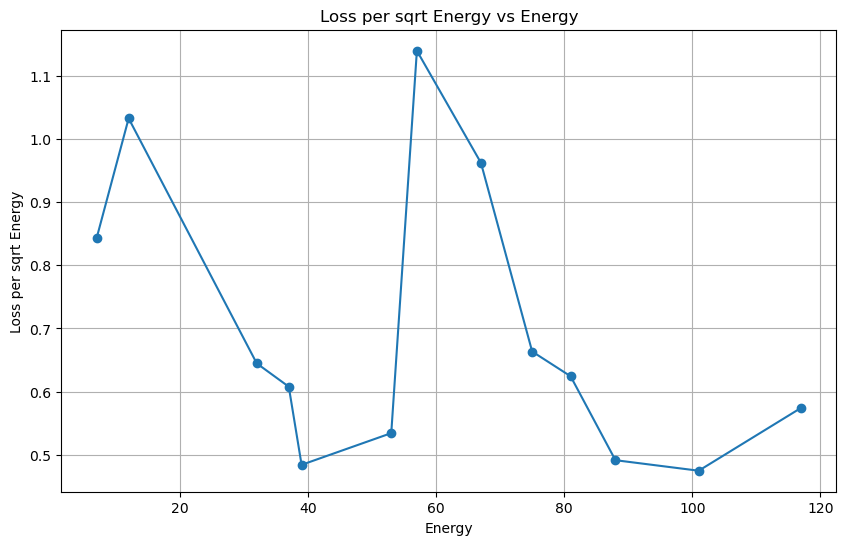

In [20]:
prediction_test_df, mean_prediction_loss_test = test_model_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df, test_df=test_df, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed)

     trajectory_id      energy  variance_loss  variance_per_sqrt_energy
7                7    7.000942            0.0                       0.0
12              12   12.000901            0.0                       0.0
32              32   32.000736            0.0                       0.0
37              37   37.000694            0.0                       0.0
39              39   39.000678            0.0                       0.0
53              53   53.000562            0.0                       0.0
57              57   57.000529            0.0                       0.0
67              67   67.000446            0.0                       0.0
75              75   75.000380            0.0                       0.0
81              81   81.000331            0.0                       0.0
88              88   88.000273            0.0                       0.0
101            101  101.000165            0.0                       0.0
117            117  117.000033            0.0                   

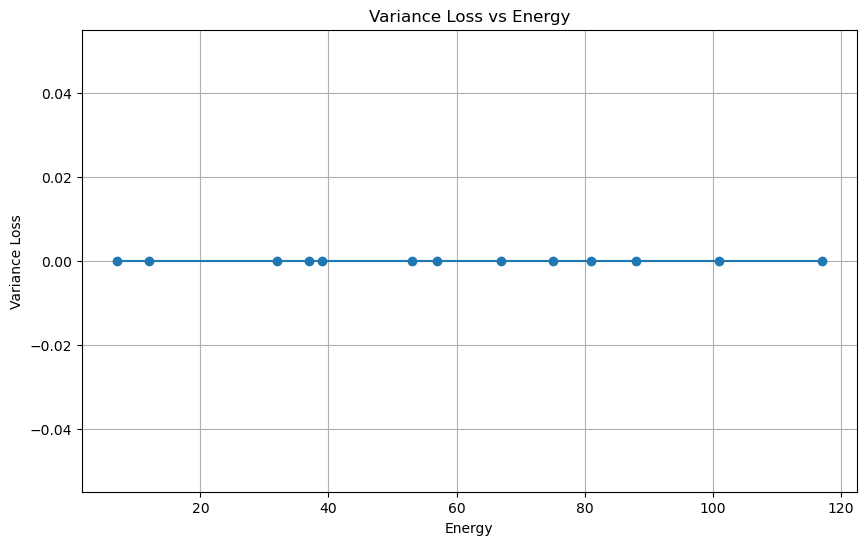

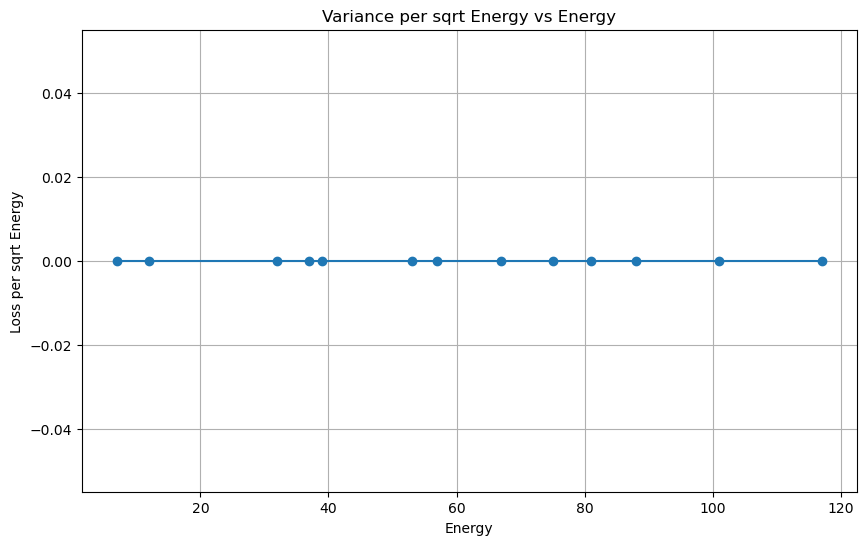

In [21]:
variance_test_df, mean_variance_loss_test = test_model_variance_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, test_id_df=test_id_df, test_df=test_df, mapping_net=mapping_net, device=device, point_indexes_observed=point_indexes_observed)


Observed time points: [0.]


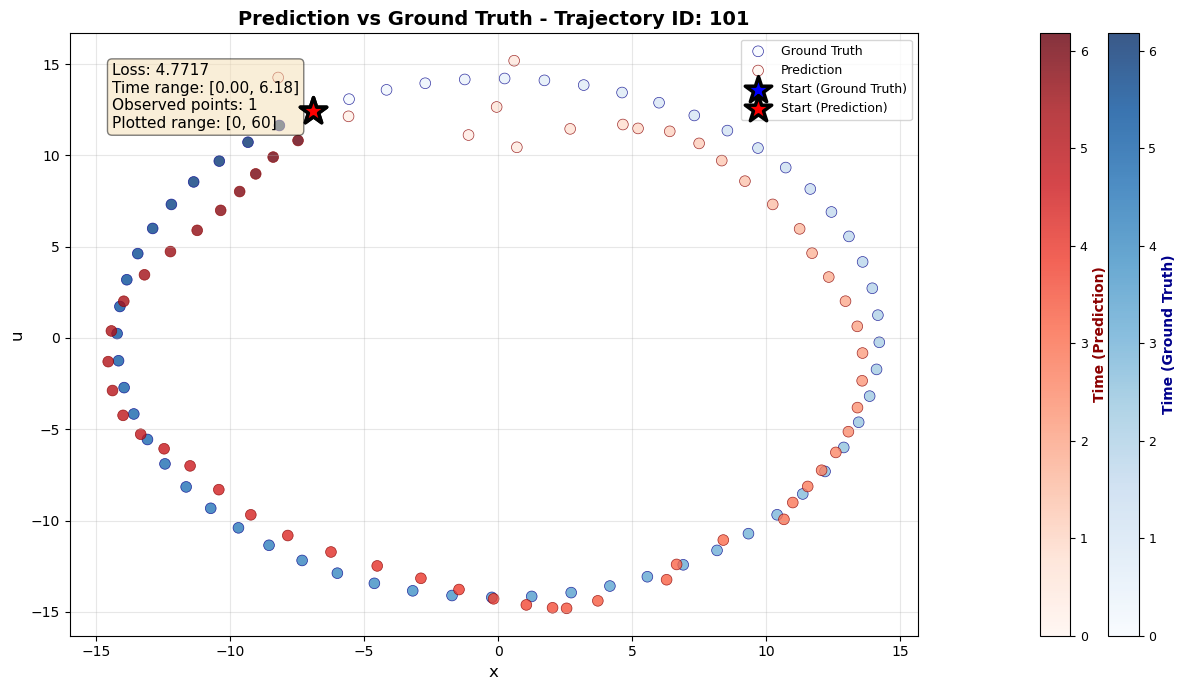

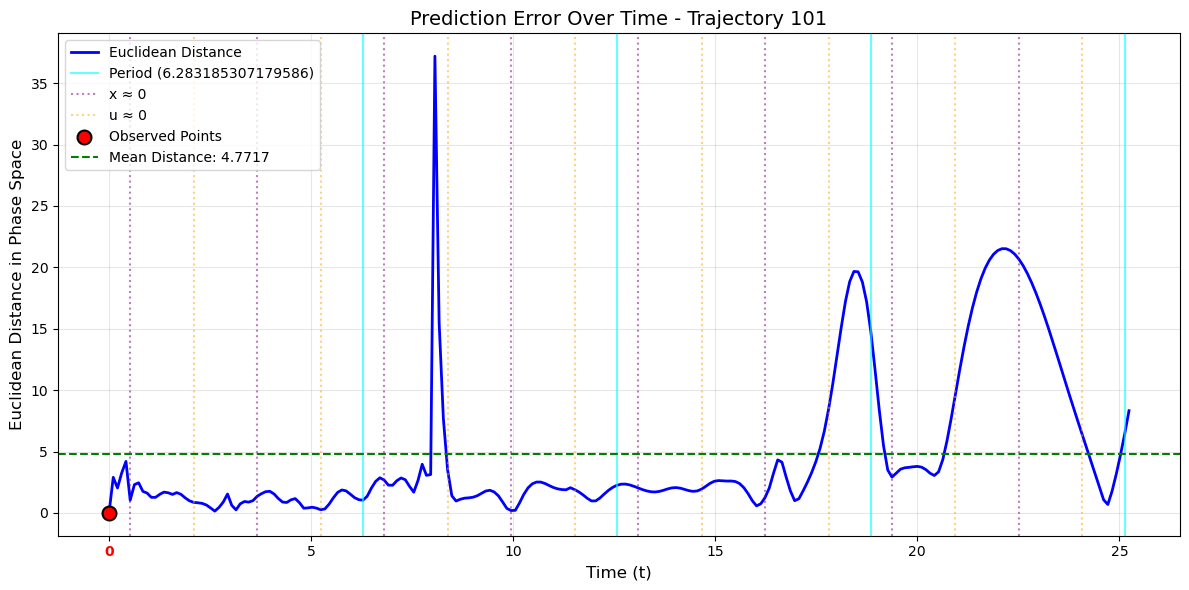

In [12]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df, test_df=test_df, trajectory_id=101, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, connect_points=False, portion_to_visualize=[0,60], show_zeroings=True, show_period=True, period=period)

In [14]:
point_indexes_observed_high_energy = [0]

    trajectory_id      energy  prediction_loss  loss_per_sqrt_energy
2               2  129.709677         3.282776              0.288241
4               4  138.419355         6.581646              0.559418
5               5  142.774194        12.167925              1.018337
6               6  147.129032         2.513170              0.207192
9               9  160.193548         4.629746              0.365792
10             10  164.548387         8.829725              0.688336
12             12  173.258065        14.048213              1.067270
14             14  181.967742         4.265939              0.316240
15             15  186.322581        35.056419              2.568235
17             17  195.032258        41.523003              2.973278
19             19  203.741935        31.991301              2.241257
20             20  208.096774        19.038004              1.319741
22             22  216.806452        27.515680              1.868720
26             26  234.225806     

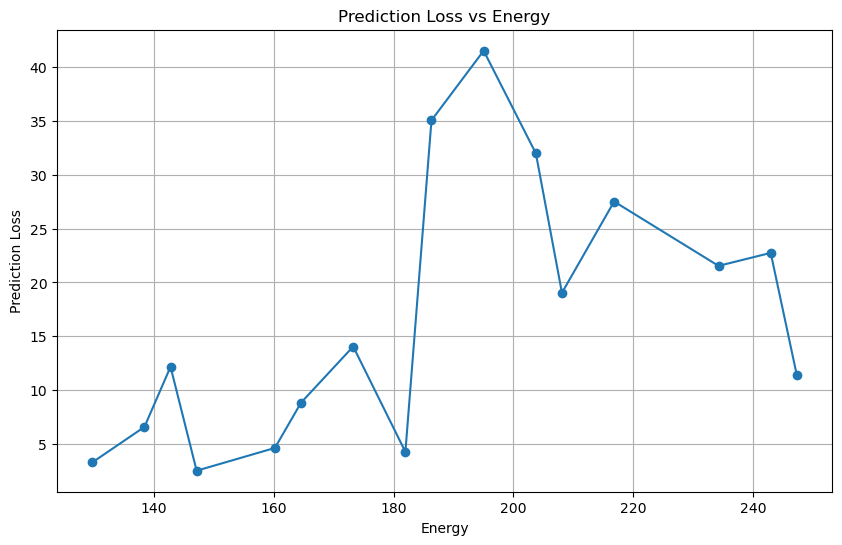

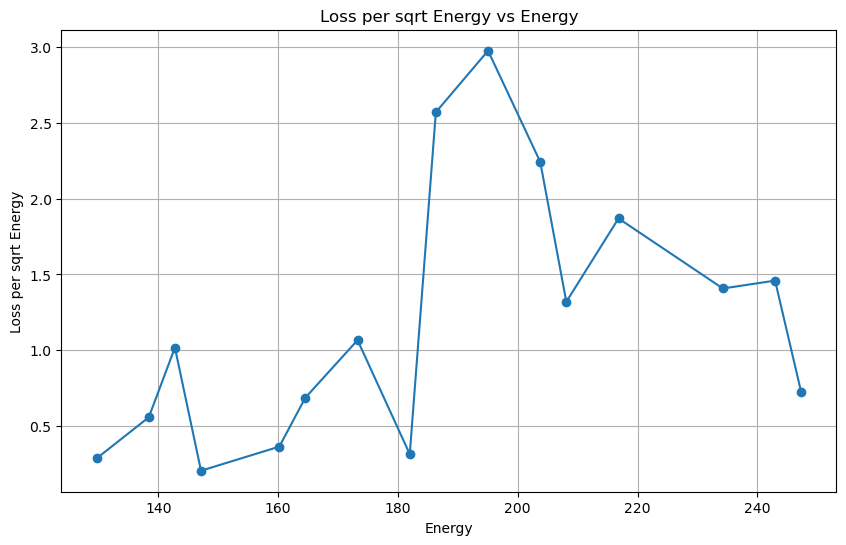

In [24]:
prediction_test_high_energy_df, mean_prediction_loss_test_high_energy = test_model_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df_high_energy_revised, test_df=test_df_high_energy_revised, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed_high_energy)

    trajectory_id      energy  variance_loss  variance_per_sqrt_energy
2               2  129.709677            0.0                       0.0
4               4  138.419355            0.0                       0.0
5               5  142.774194            0.0                       0.0
6               6  147.129032            0.0                       0.0
9               9  160.193548            0.0                       0.0
10             10  164.548387            0.0                       0.0
12             12  173.258065            0.0                       0.0
14             14  181.967742            0.0                       0.0
15             15  186.322581            0.0                       0.0
17             17  195.032258            0.0                       0.0
19             19  203.741935            0.0                       0.0
20             20  208.096774            0.0                       0.0
22             22  216.806452            0.0                       0.0
26    

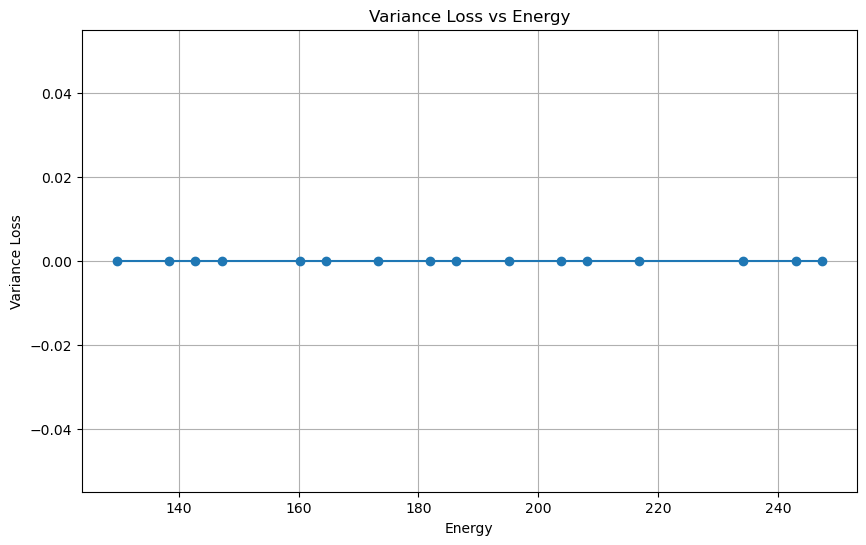

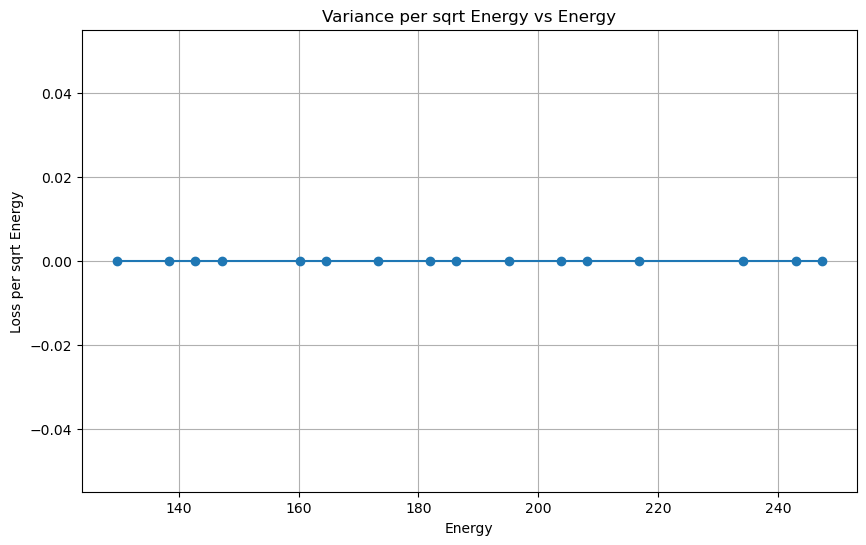

In [25]:
variance_test_high_energy_df, mean_variance_loss_test_high_energy = test_model_variance_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, test_id_df=test_id_df_high_energy_revised, test_df=test_df_high_energy_revised, mapping_net=mapping_net, device=device, point_indexes_observed=point_indexes_observed_high_energy)


Observed time points: [0.]


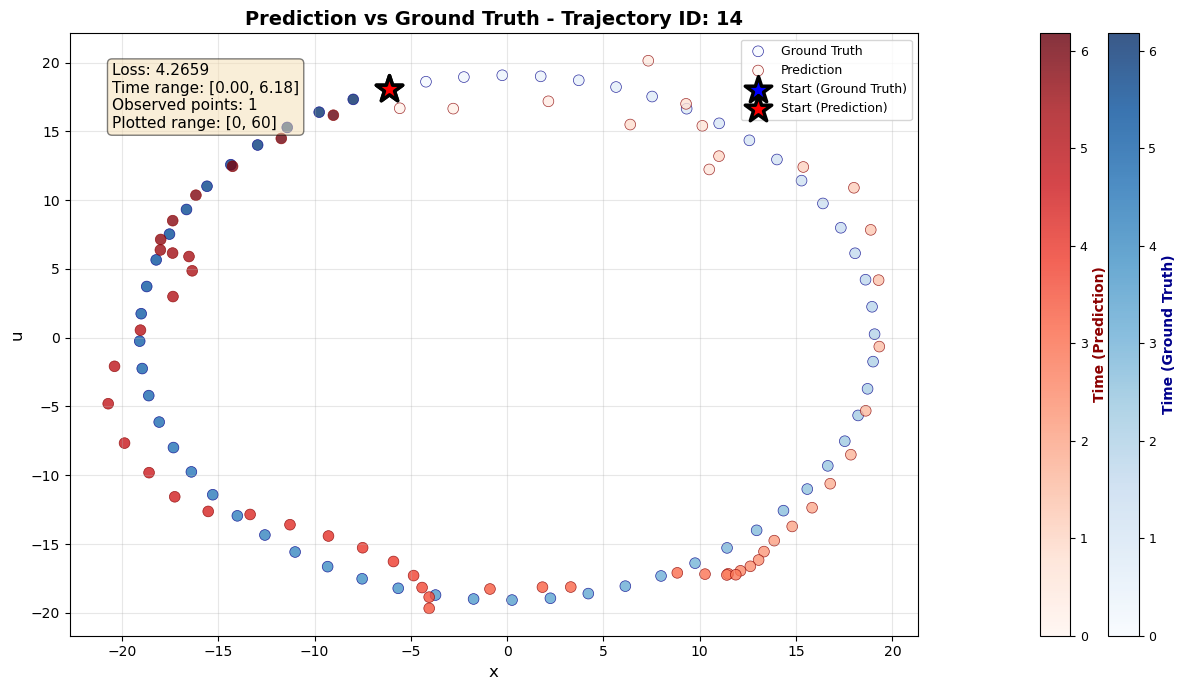

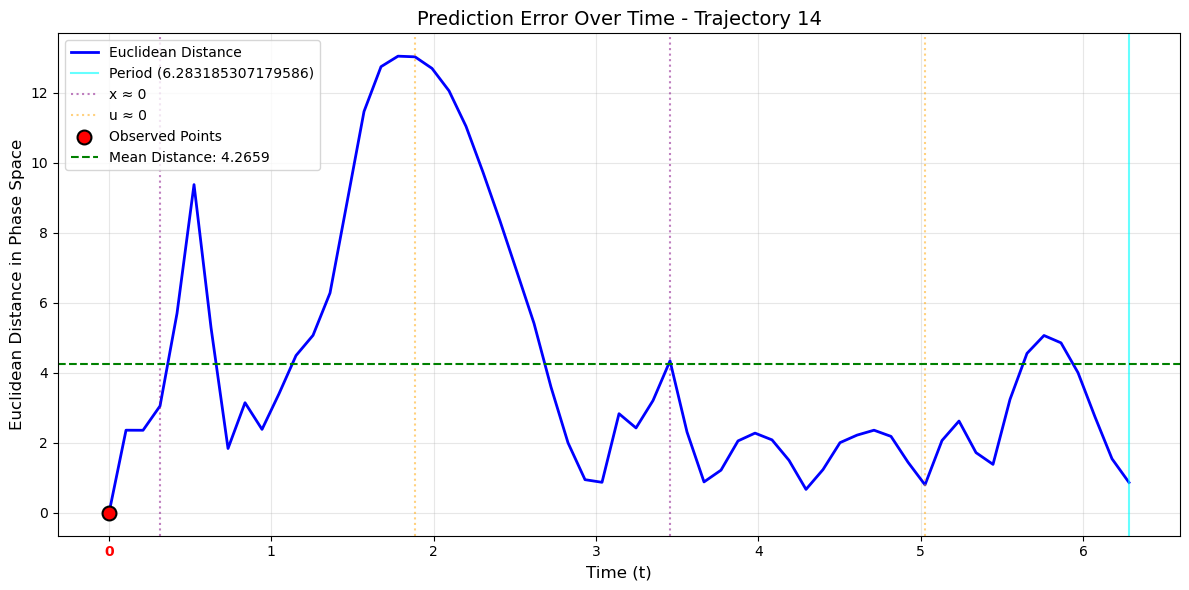

In [15]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df_high_energy_revised, test_df=test_df_high_energy_revised, trajectory_id=14, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed_high_energy, connect_points=False, portion_to_visualize=[0,60], show_zeroings=True, show_period=True, period=period)

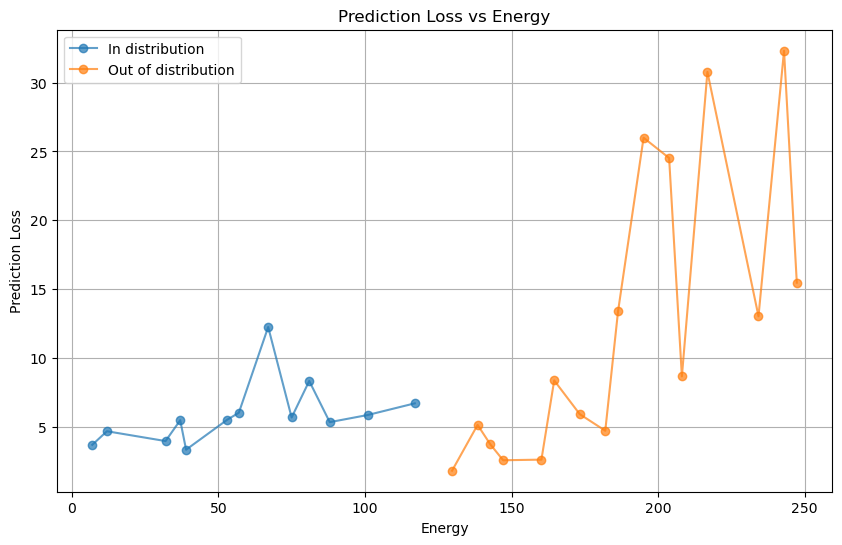

In [20]:
plot_prediction_losses([prediction_test_df, prediction_test_high_energy_df])

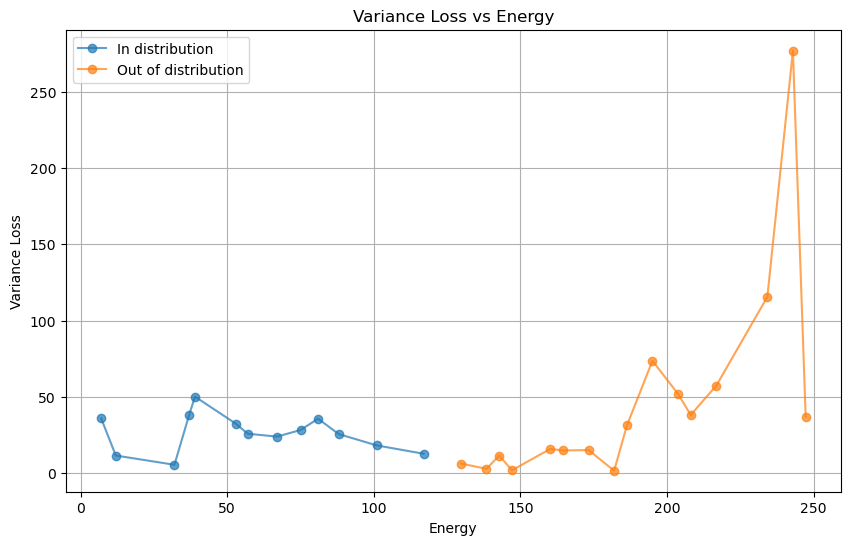

In [21]:
plot_variance_losses([variance_test_df, variance_test_high_energy_df])

Step 1 gamma values mean: 1.802±2.713

Step 2 gamma values mean: 2.080±2.321



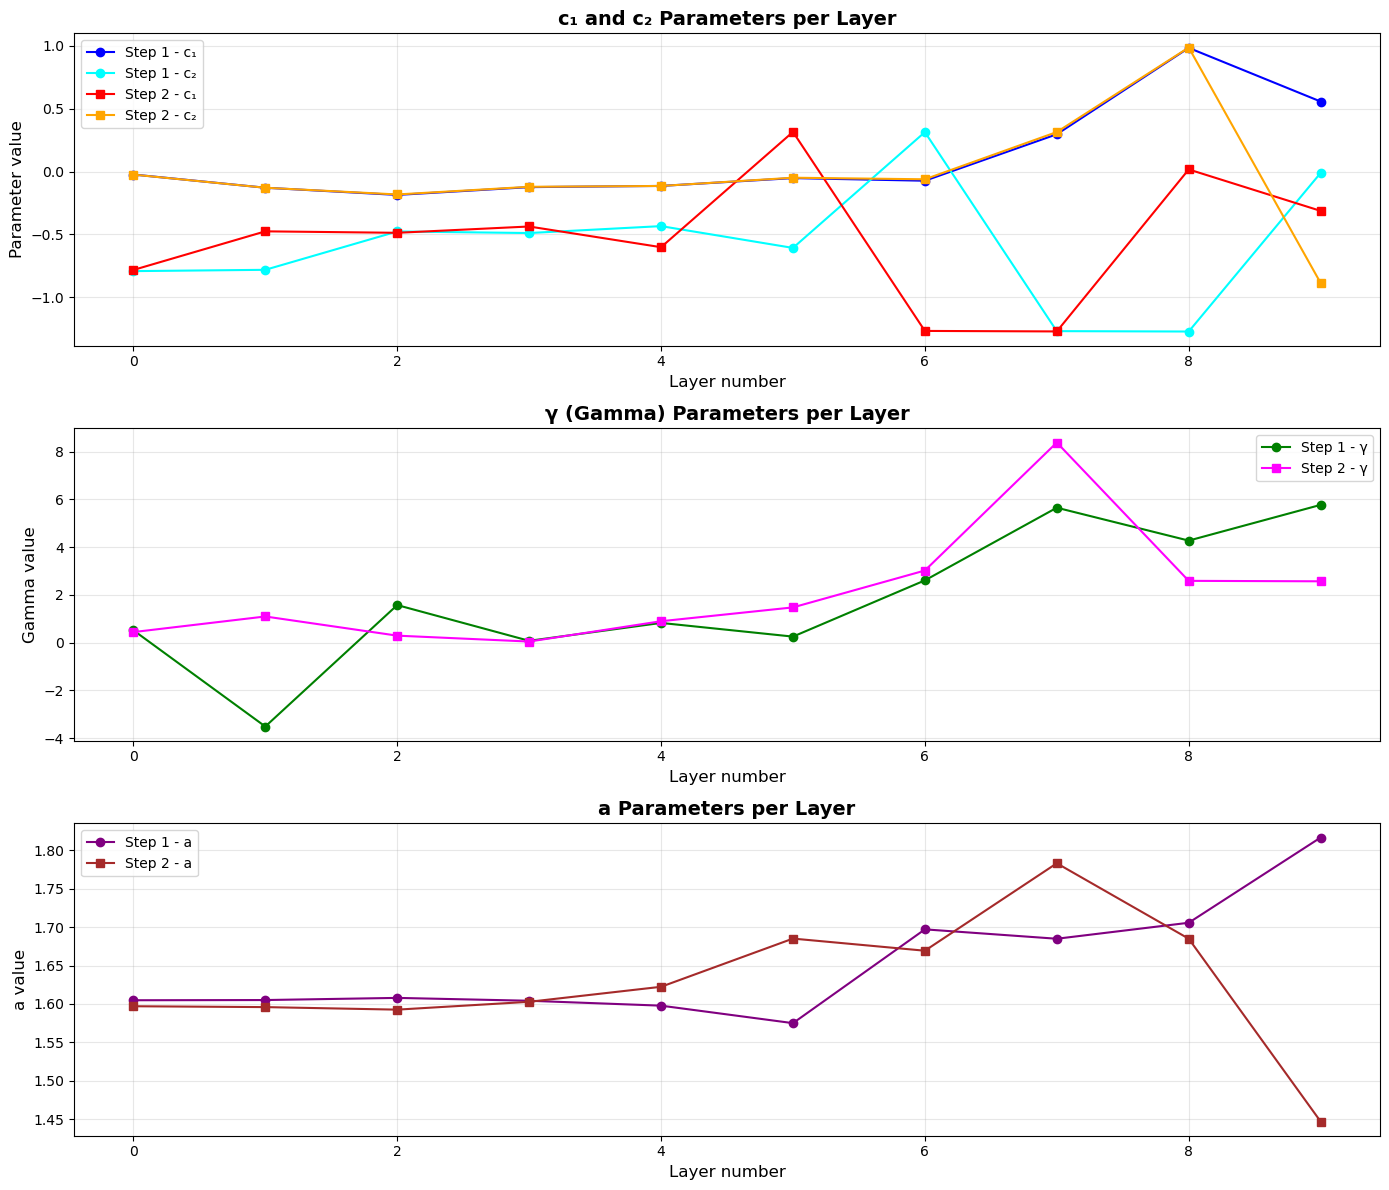

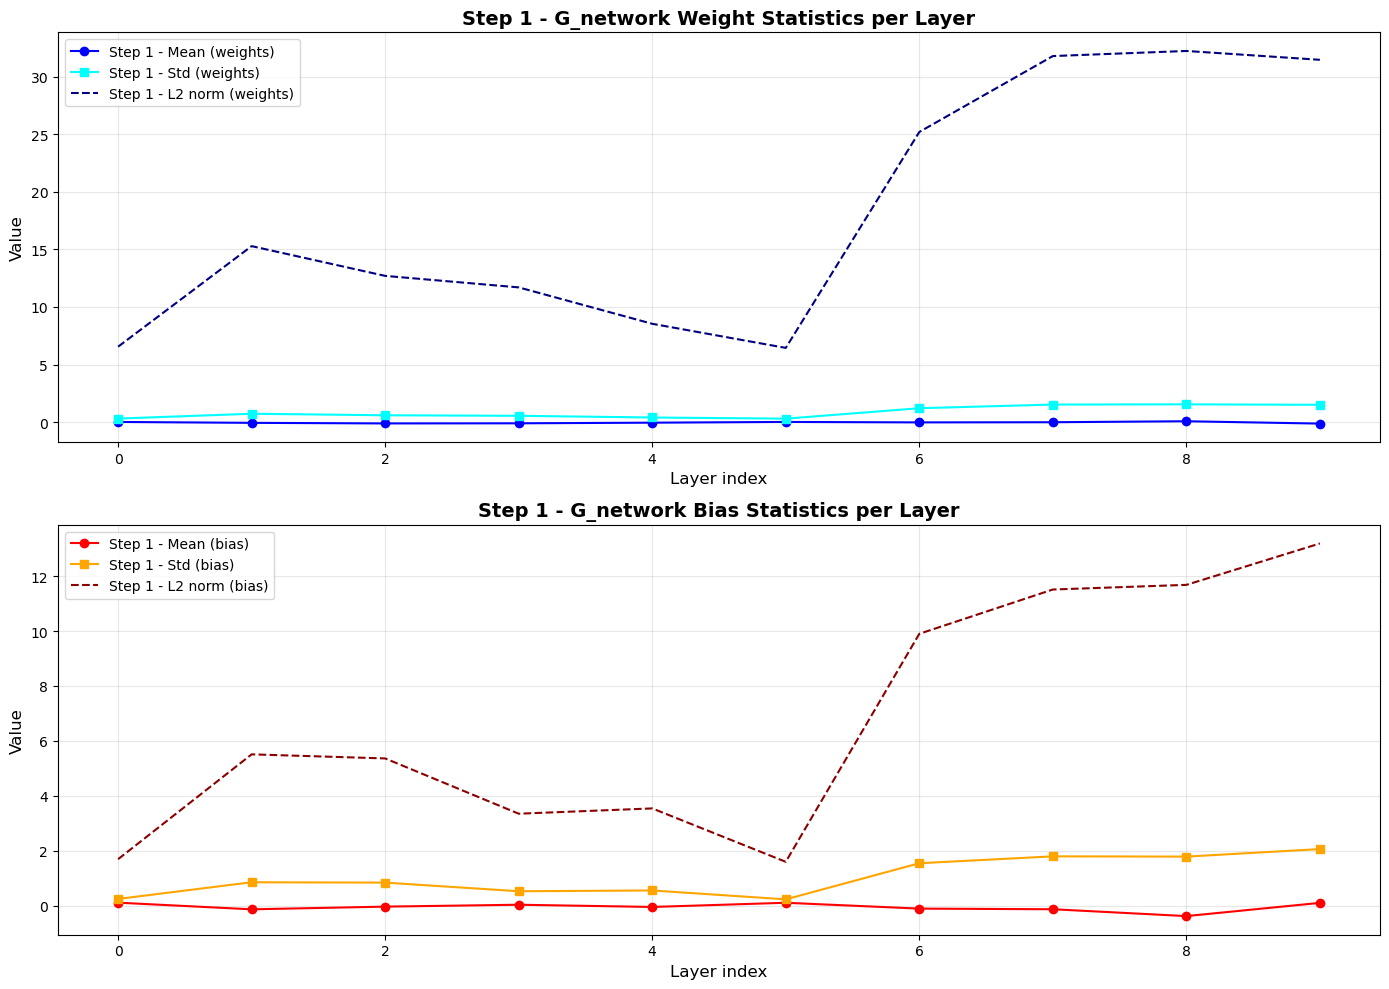

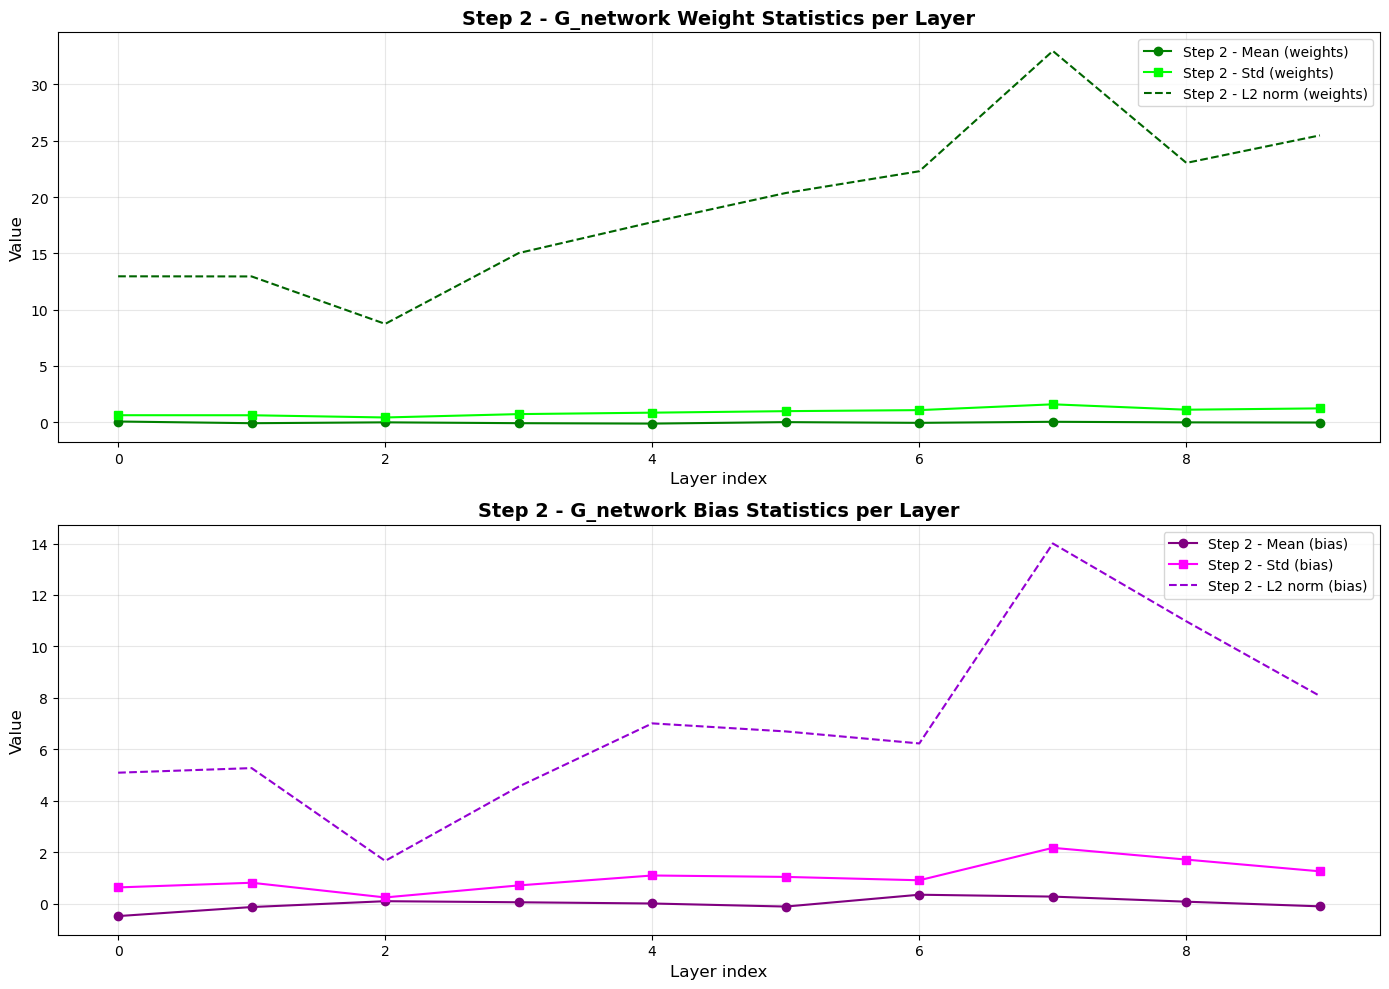

In [9]:
param_data = analyze_mapping_net(mapping_net, return_lists=True)


In [102]:
    mapping_net_test = SimpleStackedHamiltonianNetwork(
        #Hpw many Step_1 + Step_2 layers to stack
        n_layers=10,
        # MLP Architecture parameters
        hidden_dims= [33, 60, 32],
        n_hidden_layers = None,   #Leave None if you provide list on hidden_dims
        
        # Activation parameters
        activation = 'gelu',
        activation_params = None,
        final_activation = None,   #Final layer activation function
        final_activation_only_on_final_layer = True,
        tanh_wrapper = False,
        
        # Initialization parameters
        weight_init = 'orthogonal',
        weight_init_params = {'gain': 1},
        bias_init = 'zeros',
        bias_init_value = 0.0,
        
        
        # Architectural choices
        use_bias = True,
        use_layer_norm = False,
        
        # Input/Output parameters
        input_dim = 2,  # x or u and t
        output_dim = 1,  # scalar G or F
        a_eps_min= 0.5,  # Minimum value for a
        a_eps_max= 2,  # Maximum value for a  
        a_k= 0.1,

        step_1_a_mean_innit= 1.0,
        step_2_a_mean_innit= 1.0,
        std_to_mean_ratio_a_mean_init= 0.3,

        step_1_gamma_mean_innit= 3.5,
        step_2_gamma_mean_innit= 2.5,
        std_to_mean_ratio_gamma_mean_init= 0.3,

        step_1_c1_mean_innit= 0.0,
        step_2_c1_mean_innit= 0.0,
        std_to_mean_ratio_c1_mean_init= 0.0,

        step_1_c2_mean_innit= 0.0,
        step_2_c2_mean_innit= 0.0,
        std_to_mean_ratio_c2_mean_init= 0.0,

        bound_innit=0.0,
    )
    

In [103]:
count_parameters(mapping_net_test)

82560

In [67]:
count_parameters(mapping_net_test)

15260